## Access Satellite GHRSST L3S 1Day Day and night time Single Sensor Southern Ocean data in Zarr
A jupyter notebook to show how to access and plot the AODN satellite_ghrsst_l3s_1day_daynighttime_single_sensor_southernocean dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available at [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/165a23d7-5ef3-4cab-9e02-90c8adb941dd).

📌 The point of truth for this notebook is [on GitHub](https://github.com/aodn/aodn_cloud_optimised/tree/main/notebooks/satellite_ghrsst_l3s_1day_daynighttime_single_sensor_southernocean.ipynb).

In [1]:
dataset_name = "satellite_ghrsst_l3s_1day_daynighttime_single_sensor_southernocean"

## Install/Update packages and Load common functions

In [2]:
import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

Using CPython 3.12.11 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python3
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Using Python 3.12.11 environment at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised
Resolved 241 packages in 527ms
Audited 241 packages in 3ms
/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:3445: UserWarning: registration of accessor <class 'DataQuery.AODNAccessor'> under name 'aodn' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("aodn")


✅ Local version 0.3.2 is up to date (remote: 0.3.2)


In [3]:
from DataQuery import GetAodn

/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:3445: UserWarning: registration of accessor <class 'DataQuery.AODNAccessor'> under name 'aodn' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("aodn")


# Understanding the Dataset

In [4]:
# remote zarr dataset
aodn = GetAodn()
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 458 ms, sys: 83.5 ms, total: 542 ms
Wall time: 1.09 s


## Plot time coverage

In [5]:
aodn_dataset.get_temporal_extent()

(Timestamp('1992-03-21 11:10:00'), Timestamp('1992-07-04 11:10:00'))

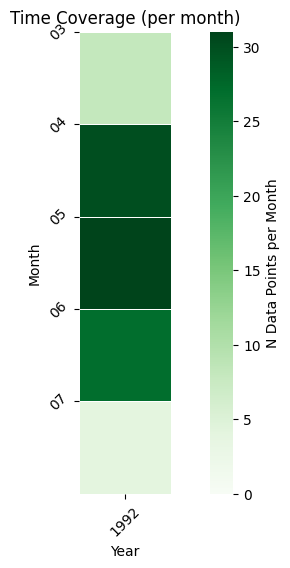

In [6]:
aodn_dataset.plot_time_coverage()

## Timeseries at a point

In [7]:
%%time
%%time
time_series_df = aodn_dataset.get_timeseries_data(var_name='sea_surface_temperature', 
                                                  lat=-40, 
                                                  lon=130, 
                                                  date_start='1992-12-01', 
                                                  date_end='1996-03-31', 
                                                  lon_name_override="lon", 
                                                  lat_name_override="lat").plot_timeseries()

ValueError: Start date 1992-12-01 00:00:00 is out of bounds. Dataset time extent is (1992-03-21 11:10:00, 1992-07-04 11:10:00) using 'time'.

CPU times: user 708 ms, sys: 68.9 ms, total: 777 ms
Wall time: 815 ms


## Plot a gridded variable

In [8]:
%%time
time_series_df = aodn_dataset.plot_gridded_variable(var_name='sea_surface_temperature', 
                                                    date_start='1995-01-26',                                                
                                                    lon_name_override="lon", 
                                                    lat_name_override="lat", 
                                                    lon_slice=(110, 140), 
                                                    lat_slice=(-50, -40), 
                                                    n_days=6, 
                                                    coastline_resolution="110m", 
                                                    log_scale=False)

2026-01-19 14:33:18,778 - aodn.GetAodn - INFO - Plotting 'sea surface foundation temperature' for 1 time steps.
2026-01-19 14:33:18,975 - aodn.GetAodn - WARNING - No valid data found across all selected dates and coordinates to determine color scale.


CPU times: user 88 ms, sys: 9.48 ms, total: 97.5 ms
Wall time: 207 ms


In [9]:
%%time
time_series_df = aodn_dataset.plot_gridded_variable(var_name='sea_ice_fraction', 
                                                    date_start='1995-01-26',                                                
                                                    lon_name_override="lon", 
                                                    lat_name_override="lat", 
                                                    lon_slice=(25, 60), 
                                                    lat_slice=(-72, -60), 
                                                    n_days=3, 
                                                    coastline_resolution="110m", 
                                                    log_scale=False)

2026-01-19 14:33:18,996 - aodn.GetAodn - INFO - Plotting 'sea ice area fraction' for 1 time steps.
2026-01-19 14:33:19,134 - aodn.GetAodn - WARNING - No valid data found across all selected dates and coordinates to determine color scale.


CPU times: user 83.9 ms, sys: 9.01 ms, total: 92.9 ms
Wall time: 151 ms
